## Jordan Bramble

## Homework 7 

## April 6 2016

In [7]:
#install.packages('tree')

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


#### Section 8.4 Problem 4

#### Section 8.4 Problem 5

under a voting approach we would classify red, given the majority of probabilities lean red. however the mean probability is .45, so we would classify green.

#### Section 8.5 Problem 8

#### a. 

In [5]:
library(ISLR)
attach(Carseats)

subset <- sample(dim(Carseats)[1], dim(Carseats)[1]/2)
train <- Carseats[subset, ]
test <- Carseats[-subset, ]

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



#### b.

In [8]:
library(tree)
treeSeats <- tree(Sales ~ ., data=train)
summary(treeSeats)


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc" "Price"     "Income"    "Age"       "US"        "Education"
[7] "CompPrice"
Number of terminal nodes:  19 
Residual mean deviance:  2.196 = 397.4 / 181 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.1210 -0.8948  0.1162  0.0000  1.0060  3.5190 

ERROR: Error in file(con, "rb"): cannot open the connection


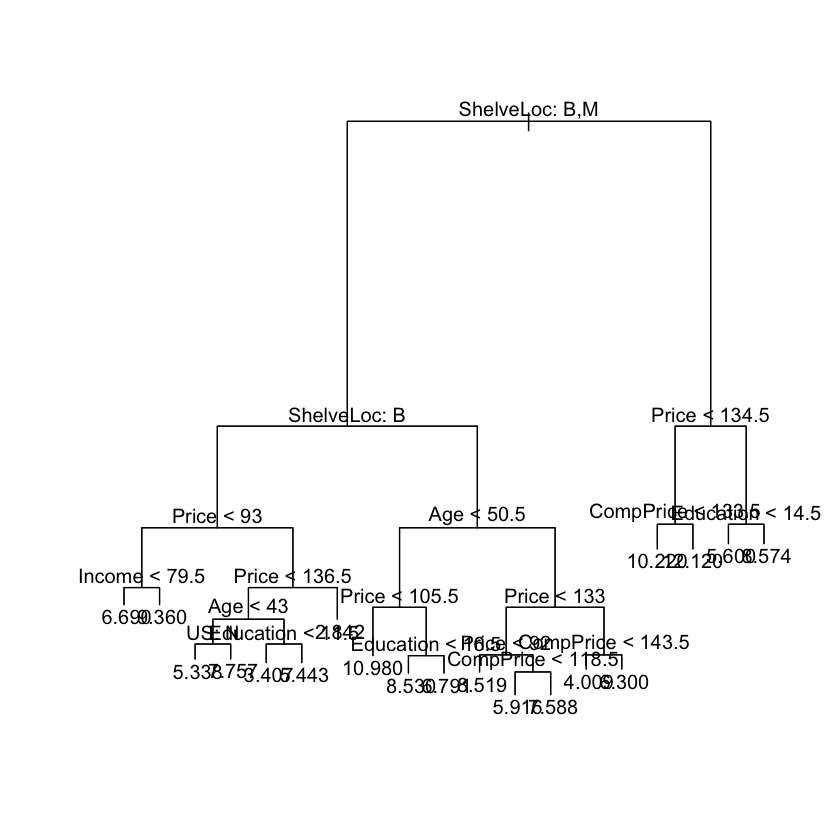

In [10]:
plot(treeSeats)
text(treeSeats, pretty=1)

In [11]:
predictions <- predict(treeSeats, test)

In [12]:
mean((test$Sales - predictions)^2)

[1] 4.417561

#### c.

In [13]:
crossV = cv.tree(treeSeats, FUN = prune.tree)
summary(crossV)

       Length Class  Mode     
size   18     -none- numeric  
dev    18     -none- numeric  
k      18     -none- numeric  
method  1     -none- character

In [18]:
prunedCV = prune.tree(treeSeats, best=9)

In [19]:
predPruned = predict(prunedCV, test)
mean((test$Sales - predPruned)^2)

[1] 4.756437

we see that this increases MSE significantly

### Section 8 Problem 12

In [22]:
df <- read.csv('~/Downloads/winequality-white.csv',sep=';')

In [23]:
head(df)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
6,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6


In [28]:
subset = sample(nrow(df), .7*nrow(df))
train=df[subset,]
test=df[-subset,]

In [29]:
head(train)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2690,7.6,0.18,0.28,7.1,0.041,29,110,0.99652,3.2,0.42,9.2,6
1672,7,0.35,0.3,6.5,0.028,27,87,0.9936,3.4,0.42,11.4,7
1524,8,0.25,0.49,9,0.044,31,185,0.998,3.34,0.49,10,6
3344,6.9,0.36,0.28,13.55,0.048,51,189,0.99782,3,0.6,9.5,7
220,7.5,0.23,0.36,7,0.036,43,161,0.9938,3.04,0.32,11,5
4474,7.1,0.36,0.2,1.6,0.271,24,140,0.99356,3.11,0.63,9.8,5


lets first get a baseline by fitting linear regression

In [30]:
fit = lm(quality ~ ., data=train)

In [31]:
summary(fit)


Call:
lm(formula = quality ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8609 -0.4898 -0.0321  0.4597  2.7771 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.264e+02  2.691e+01   8.412  < 2e-16 ***
fixed.acidity         1.149e-01  2.694e-02   4.266 2.04e-05 ***
volatile.acidity     -1.817e+00  1.295e-01 -14.034  < 2e-16 ***
citric.acid           8.636e-02  1.138e-01   0.759    0.448    
residual.sugar        1.055e-01  1.020e-02  10.352  < 2e-16 ***
chlorides            -2.467e-01  6.434e-01  -0.383    0.701    
free.sulfur.dioxide   3.878e-03  9.849e-04   3.937 8.41e-05 ***
total.sulfur.dioxide -3.171e-04  4.546e-04  -0.697    0.486    
density              -2.269e+02  2.727e+01  -8.322  < 2e-16 ***
pH                    8.445e-01  1.331e-01   6.344 2.54e-10 ***
sulphates             7.483e-01  1.218e-01   6.143 9.01e-10 ***
alcohol               9.346e-02  3.399e-02   2.749    0.006 ** 
---
Signif. 

In [32]:
fit = lm(quality ~ . - chlorides - citric.acid - total.sulfur.dioxide, data=train)

In [33]:
summary(fit)


Call:
lm(formula = quality ~ . - chlorides - citric.acid - total.sulfur.dioxide, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8698 -0.4874 -0.0359  0.4569  2.7728 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.311e+02  2.550e+01   9.064  < 2e-16 ***
fixed.acidity        1.204e-01  2.622e-02   4.592 4.56e-06 ***
volatile.acidity    -1.853e+00  1.250e-01 -14.826  < 2e-16 ***
residual.sugar       1.071e-01  9.749e-03  10.990  < 2e-16 ***
free.sulfur.dioxide  3.518e-03  7.909e-04   4.448 8.94e-06 ***
density             -2.318e+02  2.582e+01  -8.978  < 2e-16 ***
pH                   8.506e-01  1.295e-01   6.570 5.79e-11 ***
sulphates            7.493e-01  1.215e-01   6.169 7.67e-10 ***
alcohol              9.237e-02  3.354e-02   2.754  0.00592 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7453 on 3419 degrees of freedom
Multiple R-squared:  0.2959,	Adju

In [34]:
preds = predict(fit, test)

In [36]:
mean((test$quality - preds)^2)

[1] 0.5936333

now we should try boosting

In [43]:
library(gbm)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1


In [44]:
fit <- gbm(quality ~ ., data=train)

Distribution not specified, assuming gaussian ...


In [46]:
preds <- predict(fit, test, n.trees=500)

Warning message:
In predict.gbm(fit, test, n.trees = 500): Number of trees not specified or exceeded number fit so far. Using 100.

In [47]:
mean((test$quality - preds)^2)

[1] 0.7559448

In [38]:
grapeVine <- tree(quality ~ ., data=train)

In [39]:
summary(grapeVine)


Regression tree:
tree(formula = quality ~ ., data = train)
Variables actually used in tree construction:
[1] "alcohol"             "volatile.acidity"    "free.sulfur.dioxide"
Number of terminal nodes:  6 
Residual mean deviance:  0.5666 = 1939 / 3422 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.57000 -0.45830  0.04633  0.00000  0.54170  2.54200 

In [40]:
preds = predict(grapeVine, test)

In [41]:
mean((test$quality - preds)^2)

[1] 0.6008322

now time for bagging

In [49]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [51]:
fit = randomForest(quality ~ ., data = train, mtry=6)

In [52]:
preds = predict(fit, test)